![](fig/univ.png)

# AI-2: Convolutional Neural Network
## Homework 1: Artificial Neural Networks, Model Interpretation, and Regularization

**AI2 Cohort 5**<br/>
**Univ.AI**<br/>
**Instructors**:Dr. Pavlos Protopapas<br />
**Maximum Score**: 95 (+ 5 BONUS)

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [58]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf

%matplotlib inline

### INSTRUCTIONS


- This homework is a jupyter notebook. Download and work on it on your local machine.

- This homework should be submitted in pairs.

- Homework should be submitted by only one student in a team of two. If both teammates submit, scores will be penalized.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- If you decide to submit a colab notebook, ensure you have given **complete edit access** to the staff while submitting. Also add any data that requires reviewing on google drive and submit the link.


- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropraite plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

- **IMPORTANT** : Do a final "RUN" and make sure your **outputs** are all visible for **each cell** at the time of submission. We will not be able to grade any cells without outputs.

<span style="color:red"> 

**IMPORTANT** 

- Plagiarism of code/blocks of text is not acceptable for any Univ.AI submissions.
- You are allowed to refer to a publicly available source of information for a SMALL chunk of code  provided you cite it clearly. 
- Copying the code blatantly without attribution is not permitted in any case. 
- Sharing code between homework teams is strictly not allowed. In case of any confusion, you are advised to ask the staff on the Ed forum rather than assume the course of action needed.
- If caught plagiarizing, you risk expulsion from the program.
</span>

<hr style="height:2pt">

### Names of the people who worked on this homework together
#### Hari Krishna

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [40 pts]: Model interpretation and predictive intervals in NN**](#part1)
  - [Overview and Data Description](#part1intro)
  - [Questions](#part1questions)
  - [Solutions](#part1solutions)


- [**PART 2.1 [30 pts]: Kannada MNIST Kaggle competition using ANNs**](#part2.1)
  - [Problem Statement](#part2.1intro)
  - [The Kannada MNIST Dataset](#part2.1about)
  - [Downloading the Data Files](#part2.1data)
  - [AI2-C2 Homework Kaggle Competition](#part2.1kaggle)
  - [Questions](#part2.1questions)
  - [Solutions](#part2.1solutions)

- [**PART 2.2 [30 pts]: Kannada MNIST using CNNs**](#part2)
  - [Questions](#part2.2questions)
  - [Solutions](#part2.2solutions)


---

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h1> PART 1 [40 pts]: Model interpretation and predictive intervals in NN </h1> 

<a id="part1intro"></a>

<b> Overview and Data Description </b>

In this problem, you will be building and interpreting models to predict whether a flight was delayed for its arrival based on features that could be measured as the flight takes off.  
We will also estimate the predictive intervals of the model using bootstrapping. We will utilize those predictive intervals to build a new kind of model: a model that refrains from making a prediction when it is not confident.  

The included variables are:

**ARRIVAL_DELAY**: the difference between scheduled arrival and actual arrival, in minutes (positive is late, negative is early).

**DISTANCE**: the distance between arrival and departure airports, in miles.

**SCHEDULED_TIME**: the flight's scheduled travel time.

**MONTH**: the month the flight took off, 1 = January, 2 = February, etc.

**SCHED_DEP_HOUR**: the scheduled departure time (the hour of the day).

**SCHED_ARR_HOUR**: the scheduled arrival time (the hour of the day).

**FLIGHT_COUNT**: the number of flights flying out of that airport before noon on a typical day.

**DAY_OF_WEEK**: the day of the week, 1 = Monday, 2 = Tuesday, etc.

**ORIGIN_AIRPORT**: the airport the flight took off from.

**DESTINATION_AIRPORT**: the airport the flight was scheduled to land at.

For the airport codes, see: https://www.bts.gov/topics/airlines-and-airports/world-airport-codes

To sucessfully complete this part, you will proceed by fitting a NN model, evaluating its accuracy, interpreting the predictors' importance, and finally evaluating the predictive intervals.

**NOTE:** The observations were sampled so that roughly half of the observations were delayed and half of the observations were not delayed.

</div> 

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">


<h2>PART 1: Questions</h2> 

[Return to contents](#contents)

**1.1.1 [2 points]**  Read in the dataset `flights.csv`. Create a variable `DELAY_OR_NOT` that denotes whether `ARRIVAL_DELAY` is greater than or equal to 15 minutes (the FAA and BTS define a flight as delayed only if it arrives 15 minutes late or more). This is going to be the response variable for the rest of this question. 

Hint : Remember to drop the `ARRIVAL_DELAY` column.

**1.1.2 [2 points]** Preprocess the data: one-hot-encode the non-numeric categorical variables and split the data into training and test sets (use an 80/20 split with `random_state=111`). Remember to scale your data and deal with missing values should you find any. Print the resulting shapes of your $X$ and $y$ dataframes for both your train and your test sets.

**HINT**: When do you think you should scale the data? before or after splitting it?

**1.2 [2 points]** Fit an artificial neural network model using all predictors (name this model `NN_model`).  Use a dense feed-forward network with two hidden layers with 15 nodes in each hidden layer. For this network, use appropriate activation functions for each layer, select an appropriate loss function and optimizer, specify a validation split of 0.2, train for an appropriate number of epochs based on the results of your training and validation accuracy plot, and feel free to use the default batch size while training. Plot the training accuracy and validation accuracy as a function of epochs from your `NN_model` training history. Evaluate the `NN_model` model on both train and test, and print out the resulting train and test accuracies.

**1.3 [10 points]** To begin our interpretation of the resulting `NN_model`, we will first use a "proxy model" that we know how to interpret and train it on our `NN_model` training predictions.

- **1.3.1** For this we need to modify our training set. First, generate a set of `NN_model` class predictions for the training set. These training predictions will be used to form a revised training dataset for our proxy model: (a) use all of the same $X$ values used by `NN_model` for our $X$ train and (b) replace the actual response values $y$ with the predicted $\hat{y}$ values generated by the fitted `NN_model`.

- **1.3.2** Next, fit a logistic regression model using your revised training dataset from 1.3.1 (name this model `logreg`). Use ridge-like regularization. Print the `logreg` test accuracy to confirm that it is similar to what we saw for our `NN_model` test accuracy in 1.2. You may need to adjust `C` in order to achieve a similar accuracy.

- **1.3.3** Now use sklearn's `permutation_importance` class (already included in this notebook's imports) to compute the feature importance using the `logreg` model.

  - Read the official documentation for `permutation_importance` [here](https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature.) as well as [here](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) to learn how it works.

  - You can use the default number of `n_repeats` and your estimator's default `scorer`. To speed up the time it takes to run your permutations, you can try setting `n_jobs=-1` to take full advantage of all of your available processor cores.

  - Measure the **relative** variable importance (i.e. as a proportion of the variable importance of the most important variable identified by `permutation_importance`) and generate a barplot illustrating the relative variable importances for the top-10 most important predictors identified using `permutation_importance`.

**1.4 [10 points]** Another way to interpret the  `NN_model` is by examining the response as a function of any of the predictors. Particularly, we will select from features often found most significant from the analysis above. **For all 1.4 plots below**, for ease of interpretation, **please be certain to** display all predictors on their original scales. 

   - **1.4.1** Set all predictors to their means/modes except for `SCHED_DEP_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` on the data from the **training set**. Interpret what you see in 2-4 sentences.
   - **1.4.2** Set all predictors to their means/modes except for `SCHED_DEP_HOUR` and `FLIGHT_COUNT`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `FLIGHT_COUNT` from the training set (see the question 1.4 "HINT" below).

   - **1.4.3**   Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `SCHED_ARR_HOUR` from the training set.


   - **1.4.4** Set all predictors to their means/modes except for except for `SCHED_DEP_HOUR` and `DISTANCE`. Predict the probability of delay and plot the predicted probabilities of delay vs. `SCHED_DEP_HOUR` and `DISTANCE` from the training set. 
  - **1.4.5** In 5-10 sentences, interpret what you have seen in 1.4.2, 1.4.3, and 1.4.4.
  
**HINT:** 

>(A) For 1.4.2, 1.4.3, and 1.4.4, when you include `SCHED_DEP_HOUR` on one axis and your second predictor on the other axis, you can color your datapoints based on their corresponding predicted probabilities by using  the `c` and `cmap` arguments in `plt.scatter`. You can also add a labeled colorbar to your plot to make clear what those colors mean. Please refer to the matplotlib documentation for examples. 

>(B) You may use the previously trained model from part 1.2 here. 
    
**1.5 [2 points]**
    
In this part, we will attempt to do model inference. Neural Networks have too many parameters, and therefore inference on all the parameters is intractable and meaningless. 

Using the same network architecture as `NN_model` (layers, nodes, activations, etc.) and your scaled data from that model, create multiple training sets using bootstrapping and fit a separate neural network model to each bootstrapped set of data (a minimum of at least 50 bootstraps should be used). Predict the output on the test data for each model. Randomly select 8 test observations and on 8 subplots, plot the distribution of predicted probabilities (i.e. $n$ bootstrapped probabilites) with the 95% CI bounds clearly marked and reported in each subplot and the actual class of each observation included in each subplot's title for easy reference.

Interpret what you see in 3-5 sentences.

    
**NOTE:** The code for this problem can take an extremely long time to execute. Please feel free to use the provided `progressbar` function below to visually track the progress of your bootstraps.
    
**1.6 [12 points]**
    
Using the probability distribution of the predictions obtained from the bootstrapped samples above, we can evaluate how "significant" our bagged (i.e. bootstrap-aggregated) prediction will be for each test observation.

To accomplish this, you will first calculate the ratio of bootstrapped probabilities that cross the threshold value of $\hat{p}=0.5$. Let's call this ratio the **Posterior Prediction Ratio (PPR)**. When a bagged prediction's $PPR=0$, all predictions are compatible (i.e. all bootstrapped probabilities for that test observation are on the same side of $\hat{p}=0.5$). Likewise, when the $PPR=0.5$, half of the bootstrapped predictions for that test observation are $\hat{y}=0$, and the other half are $\hat{y}=1$. After calculating your $PPR$ values for all test observations, you should have $n=2000$ $PPR$ values (i.e. one for each test observation).

Next, to get more accurate predictions, we can create an **abstain** model that will abstain from making a prediction for a particular observation if some defined threshold for significance (i.e. maximum $PPR$ value) is not met. (If you'd like to learn more about abstain models, you can read more [here](https://openreview.net/forum?id=rJxF73R9tX).)

Let's explore how your resulting test accuracies might change by using your bootstrapped prediction results from question 1.5 for an **abstain bagging model** (i.e. a bootstrap aggregated model where some test observations are simply not predicted based on a given $PPR$ threshold). You can make your abstain model *stricter* by using smaller $PPR$ threshold values.

- Print the test accuracy for your **bagging model** predictions from question 1.5 using predictions for all 2,000 of our test observations. 

- Plot the test accuracies for an **abstain bagging model** using your predictions from question 1.5 as a function of increasing $PPR$ thresholds.

- Also, plot the proportion of test observations not abstained (i.e. the proportion of those predicted) for your **abstain bagging model** as a function of increasing $PPR$ thresholds.

- Interpret what you see in 3-5 sentences.

    
**NOTE**: 
>You should observe that as $PPR$ decreases (more confident predictions), you must also compromise on the number of points that your abstain model predicts confidently. 
>Range of PPR Thresholds to consider will be 0 to 0.5.

</div>

<a id="part1solutions"></a>

## PART 1: Solutions

[Return to contents](#contents)


<div class='exercise-r'>  

**1.1**

</div>

In [71]:
# your code here 
df = pd.read_csv('data/flights.csv')


In [72]:
df.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT
0,23.0,2586,342.0,9,7,15,240,3,SFO,JFK
1,10.0,1235,185.0,5,6,11,366,4,LAX,DFW
2,-7.0,184,76.0,4,17,18,172,7,BOS,LGA
3,68.0,862,148.0,7,19,21,260,7,IAH,DEN
4,24.0,236,71.0,3,20,21,266,2,LAS,LAX


In [73]:
df['DELAY_OR_NOT'] = df['ARRIVAL_DELAY'] > 15

In [74]:
df.drop('ARRIVAL_DELAY', inplace=True, axis=1)

In [75]:
df.head()

,DISTANCE,SCHEDULED_TIME,MONTH,SCHED_DEP_HOUR,SCHED_ARR_HOUR,FLIGHT_COUNT,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DELAY_OR_NOT
0,2586,342.0,9,7,15,240,3,SFO,JFK,True
1,1235,185.0,5,6,11,366,4,LAX,DFW,False
2,184,76.0,4,17,18,172,7,BOS,LGA,False
3,862,148.0,7,19,21,260,7,IAH,DEN,True
4,236,71.0,3,20,21,266,2,LAS,LAX,True


<div class='exercise-r'>  

**1.1.2**
    
</div>

In [76]:
# your code here
ohe_cols = ['MONTH', 'SCHED_DEP_HOUR', 'SCHED_ARR_HOUR', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
# ohe_cols = ['MONTH', 'DAY_OF_WEEK', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [77]:
df = pd.get_dummies(df, columns = ohe_cols, drop_first=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DELAY_OR_NOT', axis=1), df['DELAY_OR_NOT'], test_size=0.2, random_state=111)

In [15]:
#scale the x_train and x_test
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [22]:
# deal with null values in X_train


<div class='exercise-r'>  
    
**1.2**
    
</div>

In [23]:
# build your NN 
# your code here
#dense feed-forward network with two hidden layers with 15 nodes in each hidden layer
NN_model = tf.keras.models.Sequential()
NN_model.add(tf.keras.layers.Dense(15, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(tf.keras.layers.Dense(15, activation='relu'))
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2022-11-29 20:21:18.707191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 20:21:19.170192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 20:21:19.170459: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-29 20:21:19.205307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [30]:
# compile it and run it
# your code here 
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)


Epoch 1/10
200/200 [==============================] - 10s 36ms/step - loss: 0.3241 - accuracy: 0.8636 - val_loss: 0.3409 - val_accuracy: 0.8438
Epoch 2/10
200/200 [==============================] - 4s 22ms/step - loss: 0.3023 - accuracy: 0.8717 - val_loss: 0.3724 - val_accuracy: 0.8275
Epoch 3/10
200/200 [==============================] - 5s 24ms/step - loss: 0.2875 - accuracy: 0.8784 - val_loss: 0.3994 - val_accuracy: 0.8175
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.2752 - accuracy: 0.8852 - val_loss: 0.4172 - val_accuracy: 0.8163
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.2630 - accuracy: 0.8905 - val_loss: 0.4471 - val_accuracy: 0.8069
Epoch 6/10
200/200 [==============================] - 4s 22ms/step - loss: 0.2530 - accuracy: 0.8961 - val_loss: 0.4635 - val_accuracy: 0.8019
Epoch 7/10
200/200 [==============================] - 4s 18ms/step - loss: 0.2418 - accuracy: 0.8991 - val_loss: 0.4850 - val_accuracy: 0.800

In [31]:
NN_model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

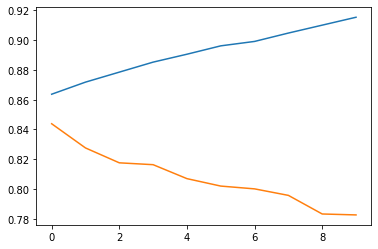

In [35]:
# plot train and val acc as  a function of epochs
# your code here
plt.plot(NN_model.history.history['accuracy'])
plt.plot(NN_model.history.history['val_accuracy'])

In [36]:
# primer to print: 
# print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))
# your code here 
y_hat = NN_model.predict(X_train)
print("NN_model_train_auc:", roc_auc_score(y_train, y_hat))


250/250 [==============================] - 3s 10ms/step
NN_model_train_auc: 0.9582647021628873


In [37]:
# your code here
y_fit = NN_model.predict(X_test)
print("NN_model_test_auc:", roc_auc_score(y_test, y_fit))


63/63 [==============================] - 1s 14ms/step
NN_model_test_auc: 0.7487853836138303


<div class='exercise-r'>

**1.3**

</div>

In [40]:
DELAY_OR_NOT = y_hat > 0.5

In [41]:
# Fit the logistic regression model
# your code here
#use ridge  regression
logreg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
logreg.fit(X_train, DELAY_OR_NOT)
y_p = logreg.predict(X_test)
roc_auc_score(y_test, y_p)



/home/munch/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7298849881853691

<div class='exercise-r'>

**1.4**    

**1.4.1**

</div>

In [42]:
# your code here
#apply permutation importance to the model 
scores = permutation_importance(logreg, X_test, y_test, scoring='roc_auc')


In [47]:
X_test.shape

(2000, 866)

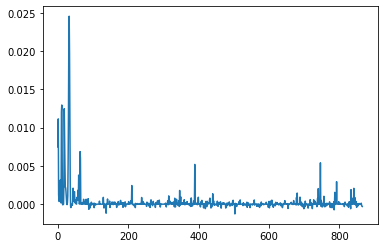

In [44]:
#plot the obtained permutation importance
plt.plot(scores.importances_mean)

In [85]:
# get the mosr important features
imp_colimns = np.argsort(scores.importances_mean)[-20:]

In [86]:
df.columns[imp_colimns]

Index(['MONTH_5', 'SCHED_ARR_HOUR_23', 'SCHED_DEP_HOUR_7',
       'ORIGIN_AIRPORT_ONT', 'SCHED_DEP_HOUR_16', 'DESTINATION_AIRPORT_LFT',
       'DAY_OF_WEEK_6', 'DAY_OF_WEEK_5', 'MONTH_10', 'DISTANCE',
       'SCHED_DEP_HOUR_6', 'SCHED_DEP_HOUR_21', 'SCHEDULED_TIME',
       'SCHED_DEP_HOUR_17', 'MONTH_8', 'SCHED_DEP_HOUR_5', 'MONTH_9',
       'SCHED_DEP_HOUR_20', 'SCHED_DEP_HOUR_18', 'SCHED_DEP_HOUR_19'],
      dtype='object')

**INTERPRETATION:**

*Your answer here*

<div class='exercise-r'>

**1.4.2**
</div>

In [95]:
# your code here
# Replace all values in all columns of the training set with the column mean
X_train


-4.758831255668108e-19

<div class='exercise-r'>

**1.4.3**
    
</div>

In [13]:
# your code here


<div class='exercise-r'>

**1.4.4**
    
</div>

In [14]:
# your code here


**INTERPRETATION:**

*your answer here*

<div class='exercise-r'>

**1.5**

</div>

In [15]:
def progressbar(n_step, n_total):
    """Prints self-updating progress bar to stdout to track for-loop progress
    
    There are entire 3rd-party libraries dedicated to custom progress-bars.
    A simple function like this is often more than enough to get the job done.
    
    :param n_total: total number of expected for-loop iterations
    :type n_total: int
    :param n_step: current iteration number, starting at 0
    :type n_step: int

    .. example::
    
        for i in range(n_iterations):
            progressbar(i, n_iterations)
            
    .. source:
    
        This function is a simplified version of code found here:
        https://stackoverflow.com/questions/3160699/python-progress-bar/15860757#15860757
    """
    n_step = n_step + 1
    barlen = 50
    progress = n_step / n_total
    block = int(round(barlen * progress))
    status = ""
    if n_step == n_total:
        status = "Done...\r\n\n"
    text = "\r [{0}] {1}/{2} {3}".format(
        "=" * block + "-" * (barlen - block),
        n_step,
        n_total,
        status,
    )
    sys.stdout.write(text)
    sys.stdout.flush()

In [16]:
%%time
# Bootstrap and train your networks and get predictions on fixed X test
# your code here


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [17]:
# generate your plot
# your code here


**INTERPRETATION:**

*your answer here*

<div class='exercise-r'>

**1.6**

</div>

In [18]:
# your code here


**INTERPRETATION:**

*your answer here*

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h1>PART 2.1 [30 pts]: Kannada MNIST Kaggle competition using ANNs </h1>

[Return to contents](#contents)


<a id="part2.1intro"></a>
<h2> Problem Statement </h2>

ANNs can be prone to overfitting, where they learn specific patterns present in the training data, but the patterns do not generalize to new data.

There are several methods used to improve ANN generalization. 

One approach is to use an architecture just barely wide or deep enough to fit the data. The idea here is that smaller networks are less expressive and thus less able to overfit the data.

However, it is difficult to know a priori the correct size of the ANN, and it is computationally costly to hunt for the correct size. Given this, other methodologies are used to prevent overfitting and improve ANNs' generalizability. These methodologies, like other techniques that combat overfitting, fall under the umbrella term of "regularization".

In this problem, you are asked to regularize a network of a given architecture.

<a id="part2.1about"></a>

<h3> The Kannada MNIST Dataset </h3>

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F1e01bcc28b5ccb7ad38a4ffefb13cde0%2Fwondu.png?generation=1603204077179447&alt=media" style="float:right">

For this problem, we will be working with a modified version of [Kannada MNIST dataset](https://arxiv.org/pdf/1908.01242.pdf) , which is a large database of handwritten digits in the indigenous language *Kannada*.

This dataset consists of 60,000 28x28 grayscale images of the ten digits, along with a test set of 10,000 images. 

For this homework, we will simplify the problem by only use the digits labeled `0` and `1` owing to the similarity of the two symbols, and we want to use a total of 1200 samples for training (this includes the data you will use for validation).

To understand the dataset better, we recommend this [article](https://towardsdatascience.com/a-new-handwritten-digits-dataset-in-ml-town-kannada-mnist-69df0f2d1456) by Vinay Prabhu, the curator of the dataset.

<a id="part2data"></a>

<h3> Downloading the Data Files </h3>

Please download all files from Kaggle. **The link will be given soon.**

Here's a brief description of the available files:

- `kmnist_train.csv` is our training dataset and the last column contains our response class. The 784 other columns correspond to the pixel values of the 28x28 dimension image.

Class 0 means a sample is the handwritten digit `0` and class 1 means a sample is the handwritten digit `1` in the Kannada language.  

- `kmnist_test.csv` has a structure similar to `kmnist_train.csv`, however the class label column is NOT included in with the test set. `kmnist_test.csv` has 2000 samples. 

Kaggle leaderboard scores are accuracy scores calculated by Kaggle when you upload your predictions on this test set.

- `sample_submission.csv` is the format that kaggle will accept.

<a id="part2.1kaggle"></a>

<h3> AI2-C2 Homework Kaggle Competition </h3>

You need to create an account on Kaggle and join the competition. **The link is in the description.** 

**This is a limited participation competition. Please DO NOT share this link you will recieve.**

For more information on the rules governing this Kaggle competition, **please [see question 2.1.3 below](#part2_3).**

</div>

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h2>PART 2.1 Questions</h2>

**2.1.1 [5 points]** **Get the data:**

- Download data from the competition page.
- We will utilize `kmnist_test.csv` in question 2.1.3.4 only. 
- Load the data and use the matplotlib function `imshow` to display a handwritten 0 and a handwritten 1.

**2.1.2 [10 points]** **Overfit an ANN:** 

Build a fully-connected network (FCN) with the architecture given below using `tensorflow.keras` and assign it to a variable called `model_overfit`:

- Number of hidden layers: 3
- Nodes per hidden layer: 100, 100, 100
- Activation function: ReLU 
- Loss function: binary_crossentropy
- Output unit: Sigmoid 
- Optimizer: adam (use the defaults; no other tuning)
- Epochs: no more than 2,000
- Batch size: 128
- Validation size: 0.3

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F3630446%2F6a491ff8d4ff590dc8ded9a25461cd4b%2FScreenshot%202020-10-20%20at%209.42.36%20PM.png?generation=1603210420701577&alt=media) 
    
This ANN, when trained on the dataset, will overfit to the training set. Plot the training accuracy and validation accuracy (the x-axis should represent the number of epochs, and the y-axis should represent the accuracy). Explain how you can tell the model is overfitting. 

<a id="part2_3"></a>

**2.1.3 [15 points]** **Regularize overfit network:**

Create an ANN that doesn't overfit and compete on Kaggle.

**DON'TS**

**Don't change the architecture**. In other words, keep the number of layers, number of nodes, activation function,  loss function and output unit the same. **No CNNs/RNNs/enhancements allowed for the competition.**

    
**NOTE**: We strongly discourage you to use a different training set than the one provided to you (Data augmentation is allowed). If the test set accuracy of your model in this notebook is significantly different than your kaggle submission score, you will receive zero credit for this segment of the homework.

    
**DOS**

You can change the number of epochs (max 2000), batch size, optimizer, and of course, add elements that can help to regularize (e.g., dropout, L2 norm, etc.). You **should** experiment with data augmentation. 


- **2.1.3.1** Display your model summary and your training and validation accuracy and loss.


- **2.1.3.2** Print the difference between the training and validation accuracies and the difference between the training and validation losses for the final trained epoch used by your model.


- **2.1.3.3** Plot the training accuracy and validation accuracy as a function of epochs.


- **2.1.3.4** Generate your test set class predictions using your regularized model. Save those predictions to a `.csv` formatted file. Submit that `.csv` file to this Kaggle Competition for leaderboard scoring.


- **2.1.3.5** **Specify your Kaggle name that you have used on the leaderboard**. *We can't give you credit without this.*


    
**IMPORTANT NOTES ABOUT SCORING**:

- The **public leaderboard** on kaggle only displays your performance on 50% of the test set.


- After the competition is complete, the **private leaderboard** will show your performance on the FULL test set.
    
Only the **top 5** competitors (as ranked on the hidden private leaderboard) will be eligible for full credit on question 2.1.3 (out of **15 points**). Remaining competitors will be scored out of **10 points** only for 2.1.3.


**ADDITIONAL RULES:**

- Multiple Kaggle submissions are permitted, **just note** that you will need to choose, on Kaggle, which submission shall be used for final scoring.


- The version of your final notebook submitted on edStem **must contain the same model** used to generate to your chosen Kaggle submission.


- **Please do not manually label your submissions.** In other words, the labels should only be the outcome of your model.


- **No external data are allowed, please only use the KMNIST training data downloaded via the link above for training your model.**


- **Do not** create multiple accounts on Kaggle.

</div>

<a id="part2.1solutions"></a>

## PART 2.1 Solutions

[Return to contents](#contents)




<div class='exercise-r'>

**2.1.1** 
    
</div>

In [98]:
# your code here 
#load the kmnist data
df = pd.read_csv('kmnist_train.csv/kmnist_train.csv')

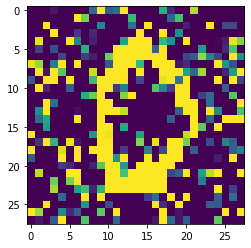

In [118]:
#imshow the images
plt.imshow(df.iloc[6,:-1].values.reshape(28,28))

<div class='exercise-r'>

**2.1.2**
    
</div>

In [120]:
# your code here
'''
Build a fully-connected network (FCN) with the architecture given below using tensorflow.keras and assign it to a variable called model_overfit:

Number of hidden layers: 3
Nodes per hidden layer: 100, 100, 100
Activation function: ReLU
Loss function: binary_crossentropy
Output unit: Sigmoid
Optimizer: adam (use the defaults; no other tuning)
Epochs: no more than 2,000
Batch size: 128
Validation size: 0.3
'''
NN_model = tf.keras.models.Sequential()
NN_model.add(tf.keras.layers.Dense(100, input_dim=df.shape[1]-1, activation='relu'))
NN_model.add(tf.keras.layers.Dense(100, activation='relu'))
NN_model.add(tf.keras.layers.Dense(100, activation='relu'))
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = NN_model.fit(df.iloc[:,:-1], df.iloc[:,-1], epochs=500, batch_size=128, verbose=1, validation_split=0.3)

Epoch 1/500
7/7 [==============================] - 2s 72ms/step - loss: 9.1060 - accuracy: 0.5131 - val_loss: 2.1429 - val_accuracy: 0.5889
Epoch 2/500
7/7 [==============================] - 0s 27ms/step - loss: 1.9582 - accuracy: 0.6333 - val_loss: 1.6614 - val_accuracy: 0.6583
Epoch 3/500
7/7 [==============================] - 0s 28ms/step - loss: 1.0485 - accuracy: 0.7048 - val_loss: 0.9597 - val_accuracy: 0.7306
Epoch 4/500
7/7 [==============================] - 0s 32ms/step - loss: 0.6413 - accuracy: 0.7774 - val_loss: 0.7320 - val_accuracy: 0.7806
Epoch 5/500
7/7 [==============================] - 0s 27ms/step - loss: 0.5440 - accuracy: 0.8310 - val_loss: 0.6197 - val_accuracy: 0.7806
Epoch 6/500
7/7 [==============================] - 0s 30ms/step - loss: 0.3246 - accuracy: 0.8845 - val_loss: 0.5694 - val_accuracy: 0.8222
Epoch 7/500
7/7 [==============================] - 0s 25ms/step - loss: 0.2416 - accuracy: 0.9250 - val_loss: 0.6245 - val_accuracy: 0.8167
Epoch 8/500
7/7 [===

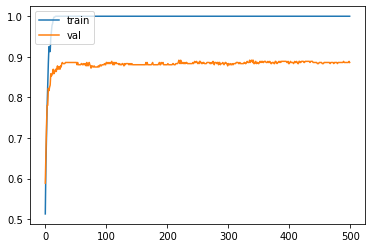

In [122]:
# Plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')

In [169]:
df_test = pd.read_csv('kmnist_test.csv/kmnist_test.csv')

In [173]:
# fit on test data
y_cap = NN_model.predict(df_test.iloc[:,:])

63/63 [==============================] - 0s 4ms/step


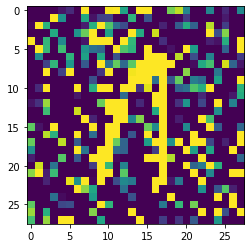

In [180]:
plt.imshow(df_test.iloc[-1,:].values.reshape(28,28))

In [181]:
pred = y_cap > 0.5

In [190]:
pd.DataFrame(pred.astype(int)).to_csv('submission.csv', index=True)

**INTERPRETATION:**

*your answer here*

<div class='exercise-r'>

**2.1.3** 

**2.1.3.1**
    
</div>

In [ ]:
# your code here
#  Display your model summary and your training and validation accuracy and loss.
NN_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("NN_model_train_auc:", roc_auc_score(df.iloc[:,-1], NN_model.predict(df.iloc[:,:-1])))
print("NN_model_test_auc:", roc_auc_score(df.iloc[:,-1], NN_model.predict(df.iloc[:,:-1])))

38/38 [==============================] - 1s 8ms/step
NN_model_train_auc: 0.9938521684244479
38/38 [==============================] - 0s 7ms/step
NN_model_test_auc: 0.9938521684244479


<div class='exercise-r'>

**2.1.3.2**
    
</div>

In [ ]:
# your code here

<div class='exercise-r'>

**2.1.3.3**
    
</div>

In [ ]:
# your code here

<div class='exercise-r'>

**2.1.3.4**
    
</div>

In [ ]:
# your code here

<div class='exercise-r'>

**2.1.3.5**
    
</div>

**YOUR KAGGLE LEADERBOARD NAME:**

*your answer here*

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<h1>PART 2.2 [30points]: KMNIST Classification using CNNs</h1>

[Return to contents](#contents)

In this part of Homework, you will now contruct a CNN-based model in order to best classify the Kannada MNIST dataset.

**2.2.1 [5 points]** Examine the dataset and prepare the data by appropriately standardizing, reshaping and type-checking. 

**2.2.2 [20 points]** Construct a simple CNN model - with not more than 10 layers. Please ensure that you use the following layers/parameters in order to contruct the model -
1. Maxpooling
2. Dense layers
3. Regularization methods such as Adam, Drop out, Batch Normalization etc. 

**2.2.3 [5 points]** Perform error analysis on the predictions of your model and report classification accuracy. This should also include loss plots that allow for comparision of the model performance across the epochs. Conclusively, provide a detailed inference of why certain misclassifications would have taken place.



</div>

<a id="part2.2solutions"></a>


## PART 2.2 Solutions

[Return to contents](#contents)


**2.2.1**

In [ ]:
#your code here
#  prepare the data by appropriately standardizing, reshaping and type-checking
df_train = pd.read_csv('kmnist_train.csv/kmnist_train.csv')
df_test = pd.read_csv('kmnist_test.csv/kmnist_test.csv')

**2.2.2**

In [ ]:
#your code here
'''
Construct a simple CNN model - with not more than 10 layers. Please ensure that you use the following layers/parameters in order to contruct the model -

Maxpooling
Dense layers
Regularization methods such as Adam, Drop out, Batch Normalization etc.
'''
CNN_model = tf.keras.models.Sequential()
CNN_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# Add more regulaization layers as well
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
CNN_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(tf.keras.layers.Flatten())
CNN_model.add(tf.keras.layers.Dense(128, activation='relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#binary cross entropy
CNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 1, 1, 128)       

In [ ]:
#prepare the train data for the above neural network
X = df_train.iloc[:,:-1].values.reshape(-1,28,28,1)
y = df_train.iloc[:,-1].values.astype('float32').reshape((-1,1))

In [ ]:
history = CNN_model.fit(X, y, epochs=100, batch_size=128, verbose=1, validation_split=0.3)

Epoch 1/100
7/7 [==============================] - 4s 184ms/step - loss: 2.7099 - accuracy: 0.4893 - val_loss: 0.8160 - val_accuracy: 0.4944
Epoch 2/100
7/7 [==============================] - 0s 66ms/step - loss: 0.9776 - accuracy: 0.5107 - val_loss: 0.6826 - val_accuracy: 0.5583
Epoch 3/100
7/7 [==============================] - 0s 71ms/step - loss: 0.7211 - accuracy: 0.5214 - val_loss: 0.6873 - val_accuracy: 0.5611
Epoch 4/100
7/7 [==============================] - 0s 66ms/step - loss: 0.6829 - accuracy: 0.5429 - val_loss: 0.6724 - val_accuracy: 0.5556
Epoch 5/100
7/7 [==============================] - 0s 68ms/step - loss: 0.6640 - accuracy: 0.6298 - val_loss: 0.6721 - val_accuracy: 0.5083
Epoch 6/100
7/7 [==============================] - 0s 65ms/step - loss: 0.6508 - accuracy: 0.6012 - val_loss: 0.6554 - val_accuracy: 0.6583
Epoch 7/100
7/7 [==============================] - 0s 70ms/step - loss: 0.6387 - accuracy: 0.6655 - val_loss: 0.6666 - val_accuracy: 0.5028
Epoch 8/100
7/7 [==

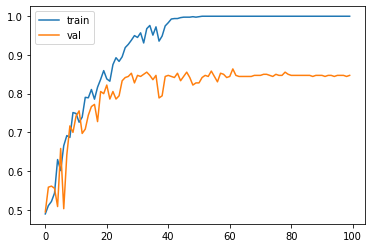

In [ ]:
# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc='upper left')

**2.2.3**

In [ ]:
#your code here

**Error Analysis Inference:**

*your answer here*